In [409]:
# Import modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# HEALTHY DIET DATA ------------------------------------------------------------------------
# Import data from cleaned csv
# From: https://databank.worldbank.org/source/food-prices-for-nutrition

columns = ['country_name', 'country_code', 'year', 'population', 'millions_healthy_diet','millions_nutrient','millions_calories','percent_healthy_diet','percent_nutrient','percent_calories','affordability_energy','affordability_nutrient','affordability_healthy_diet']

DFDiet = pd.read_csv("./healthy diet.csv", names=columns, header=0)

display(DFDiet)

,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet
0,Albania,ALB,2017.0,2873457.0,0.9,0.3,0.0,31.3,8.9,0.0,0.078,0.266,0.425
1,Albania,ALB,2018.0,2866376.0,0.7,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,2019.0,2854191.0,0.6,NaN,NaN,22.2,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,2020.0,2837849.0,0.6,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2021.0,2811666.0,0.4,NaN,NaN,15.7,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Zimbabwe,ZWE,2017.0,14751101.0,10.0,1.6,0.0,67.8,10.6,0.0,0.106,0.314,0.973
926,Zimbabwe,ZWE,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,Zimbabwe,ZWE,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,Zimbabwe,ZWE,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1> Graph 1 with analysis </h1>

<h3> Distribution of average population over 2017-2021 for the top 20 most-populated countries </h3>

In [410]:


countries_to_exclude = ['South Asia', 'North America', 'Middle East & North Africa', 'Low income', 'Latin America & Caribbean', 'Europe & Central Asia', 'Sub-Saharan Africa', 'High income', 'East Asia & Pacific', 'Upper middle income', 'Lower middle income', 'WORLD']  # Add more countries if needed

# Filter out the countries to exclude
DFDiet_filtered = DFDiet[~DFDiet['country_name'].isin(countries_to_exclude)]

average_population = DFDiet_filtered.groupby('country_name')['population'].mean()

# Sort the countries based on their average population
sorted_average_population = average_population.sort_values(ascending=False)

# Select the top 20 countries with the highest average population
top_20_countries = sorted_average_population.head(20)

top_20_countries




country_name
China                 1.406036e+09
India                 1.382052e+09
United States         3.287667e+08
Indonesia             2.693519e+08
Pakistan              2.236007e+08
Brazil                2.115954e+08
Nigeria               2.033834e+08
Bangladesh            1.655543e+08
Russian Federation    1.441807e+08
Japan                 1.264717e+08
Mexico                1.249284e+08
Ethiopia              1.141844e+08
Philippines           1.103519e+08
Egypt, Arab Rep.      1.055752e+08
Vietnam               9.576816e+07
Congo, Dem. Rep.      9.000496e+07
Iran, Islamic Rep.    8.638009e+07
Türkiye               8.345833e+07
Germany               8.300254e+07
Thailand              7.128211e+07
Name: population, dtype: float64

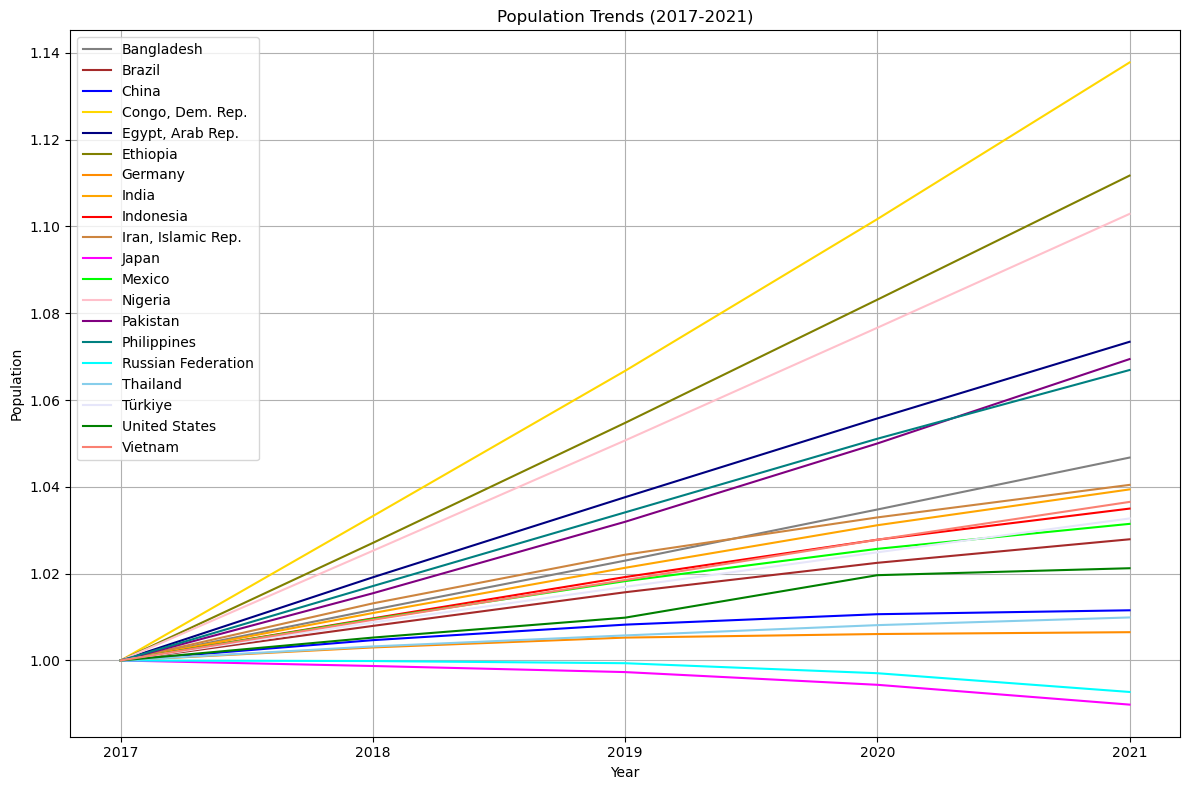

In [411]:
top20 = ['China', 'India', 'United States', 'Indonesia', 'Pakistan','Brazil', 'Nigeria', 'Bangladesh', 'Russian Federation', 'Japan','Mexico', 'Ethiopia', 'Philippines', 'Egypt, Arab Rep.', 'Vietnam','Congo, Dem. Rep.', 'Iran, Islamic Rep.', 'Türkiye', 'Germany', 'Thailand']


columns_to_keep = ['country_name', 'country_code', 'year', 'population', 'percent_healthy_diet']
DFDiet_filtered2 = DFDiet_filtered[columns_to_keep]

filtered_df = DFDiet_filtered2[DFDiet_filtered2['country_name'].isin(top20)]


grouped_by_country = filtered_df.groupby('country_name')

# Plotting
plt.figure(figsize=(12, 8))  # Set the size of the plot

color_map = {
    'China': 'blue',
    'India': 'orange',
    'United States': 'green',
    'Indonesia': 'red',
    'Pakistan': 'purple',
    'Brazil': 'brown',
    'Nigeria': 'pink',
    'Bangladesh': 'gray',
    'Russian Federation': 'cyan',
    'Japan': 'magenta',
    'Mexico': 'lime',
    'Ethiopia': 'olive',
    'Philippines': 'teal',
    'Egypt, Arab Rep.': 'navy',
    'Vietnam': 'salmon',
    'Congo, Dem. Rep.': 'gold',
    'Iran, Islamic Rep.': 'peru',
    'Türkiye': 'lavender',
    'Germany': 'darkorange',
    'Thailand': 'skyblue'
}


# Iterate through each group (country) and plot its population over the years
for country, data in grouped_by_country:
    population_2017 = data[data['year'] == 2017]['population'].values[0]
    growth_rate = data['population'] / population_2017
    plt.plot(data['year'], growth_rate, label=country, color = color_map[country])
    #plt.plot(data['year'], data['population'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends (2017-2021)')
plt.legend()  # Show legend with country names

plt.grid(True)  # Add grid lines
plt.xticks(range(2017, 2022))  # Set ticks for x-axis to show years
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

### Discussion:

1) This graph illustrates the population trends from 2017 to 2021 across the top 20 countries with the largest populations. Each line represents a country, tracing its population changes over the five-year period. China and India have the most people, each with about 1.4 billion. That's a lot considering there are around 8 billion people on Earth. The USA is third with about 330 million people. It's interesting that only one European country, Germany, is in the top 20. Germany has around 83 million people. 

2) I decided to divide each country's population value over these 5 years by their population in 2017. This approach normalizes the data, providing a common baseline for comparison across different countries. By using the population in 2017 as a reference point, we can effectively assess relative changes in population size over time. The graph illustrates that the Democratic Republic of the Congo is experiencing the most rapid population growth among the top 20 countries analyzed. Over the span of five years, its population has increased by nearly 14 percent. Additionally, Ethiopia, Nigeria, Egypt, Pakistan, and the Philippines have all seen their populations grow by over 5 percent. It's interesting to see that all these countries with growing populations are developing countries. This can be explained by a couple of things that are commonly related with developing countries such as high birthrates, improvements in healthcare leading to lower mortality rates, limited access to contraception, and cultural or societal preferences for larger families. On the other hand, there are 2 countries with a slightly declining population, Russia & Japan. Last spring, I studied abroad in Tokyo and traveled in Japan. The aging population is becoming a real issue there. In Tokyo, there are still lots of young people, but in smaller towns, there are more old people than young ones. This is not good for their economy.Implementing policies or programs that support families in raising children, such as providing childcare subsidies, parental leave, or tax incentives for having more children, could help increase the birth rate and balance the age demographic.

<h1> Graph 2 with analysis </h1>

<h3> Percentage healthy diet Trends (2017-2021) for the top 20 worst countries </h3>

In [412]:


average_healthy_diet = DFDiet_filtered.groupby('country_name')['percent_healthy_diet'].mean()

# Sort the countries based on their average population
sorted_average_healthy_diet = average_healthy_diet.sort_values(ascending=False)

# Select the top 20 countries with the highest average population
top_20_countriesDiet = sorted_average_healthy_diet.head(20)

top_20_countriesDiet

country_name
Madagascar                  97.42
Central African Republic    95.58
Burundi                     95.48
Malawi                      95.28
Mozambique                  93.66
Nigeria                     91.98
Liberia                     91.84
Niger                       91.52
Sudan                       90.52
Congo, Rep.                 90.18
Congo, Dem. Rep.            89.40
Zambia                      89.20
Guinea                      88.74
Haiti                       86.94
Lesotho                     85.64
Tanzania                    85.26
Benin                       84.94
Angola                      84.58
Burkina Faso                84.42
Guinea-Bissau               84.14
Name: percent_healthy_diet, dtype: float64

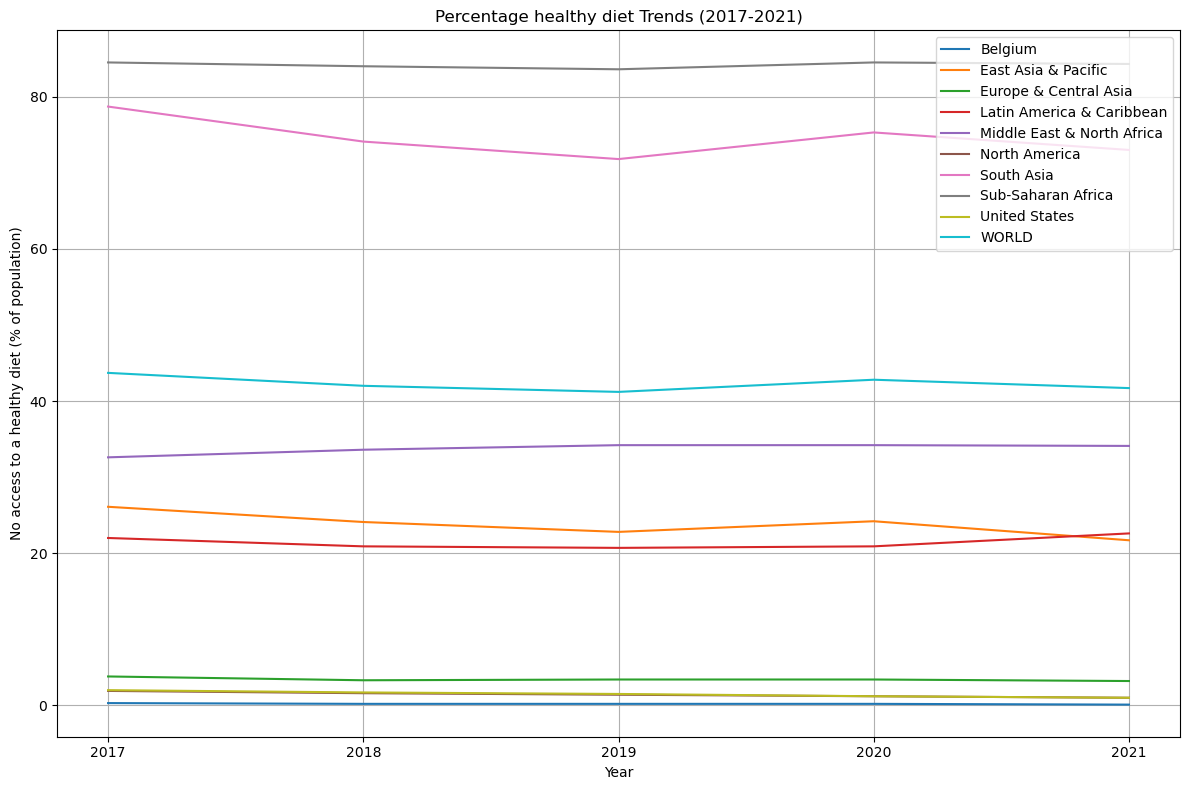

In [413]:
Continents = ["Belgium","United States","Europe & Central Asia","Latin America & Caribbean","Middle East & North Africa","North America","East Asia & Pacific","South Asia","Sub-Saharan Africa","WORLD"]


Top20Diet = ["Madagascar","Central African Republic","Burundi","Malawi","Mozambique","Nigeria","Liberia","Niger","Sudan","Congo, Rep.","Congo, Dem. Rep.""Zambia","Guinea","Haiti","Lesotho","Tanzania", "Benin","Angola","Burkina Faso","Guinea-Bissau"]

filtered_dfDiet = DFDiet[DFDiet['country_name'].isin(Continents)]

grouped_by_countryDiet = filtered_dfDiet.groupby('country_name')

# Plotting
plt.figure(figsize=(12, 8))  # Set the size of the plot

# Iterate through each group (country) and plot its population over the years
for country, data in grouped_by_countryDiet:
    plt.plot(data['year'], data['percent_healthy_diet'], label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('No access to a healthy diet (% of population)')
plt.title('Percentage healthy diet Trends (2017-2021)')
plt.legend()  # Show legend with country names

plt.grid(True)  # Add grid lines
plt.xticks(range(2017, 2022))  # Set ticks for x-axis to show years
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

### Discussion:

1) This graph shows how the percentage of people without access to a healthy diet changed in different continents, the USA and Belgium, from 2017 to 2021. We can see some fluctuations and changes in the percentage of the population that has access to a healthy diet. When lines slope downward, it indicates a decrease in the number of individuals without access to a healthy diet. Conversely, when lines incline upward, it signifies an increase in the proportion of people facing challenges in maintaining access to a healthy diet. I included all major regions of the world in order to compare them to eachother. I also included the USA and Belgium to see how good or bad they are doing compared to all regions in the world. (I am a Belgian citizen). 

2) More specifically, in this graph, we can see that Sub-Saharan Africa has the worst percentage. In other words, around 84% of the population in Sub-Sahara Africa does not have access to a healthy diet. This is as expected, examining the top 20 countries in the world with the highest percentage of their population that do not have access to a healthy diet. Most countries of that top 20 are situated in Sub-Saharan Africa. Not far below that, we find South Asia with an average of around 75%. Europe & Central Asia, along with North America, have by far the lowest percentages (all under 5%). The USA and North America have very similar values and therefore their lines overlap on the graph. Belgium is all the way on the bottom with an average of around 0.2%. This means that 99.8% of Belgians have access to a healthy diet. 

<h1> Graph 3 with analysis </h1>

<h3> Scatter Plot of Healthy Diet vs Internet Usage </h3>

In [418]:
# INTERNET USAGE DATA ------------------------------------------------------------------------
# Import data from cleaned csv
# From: https://databank.worldbank.org/reports.aspx?source=2&series=IT.NET.USER.ZS&country
# dataset consists of all countries and its % of the population using the internet for 2017-2021.
# Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.

columns = ['country_name', 'country_code', 'Time','Time Code','Individuals using the Internet (% of population)']

DFInternet = pd.read_csv("./Internet connection.csv", names=columns, header=0, usecols=range(len(columns)))

# Reset the index to default row numbers
DFInternet.reset_index(drop=True, inplace=True)

# Display the dataframe
display(DFInternet)

,country_name,country_code,Time,Time Code,Individuals using the Internet (% of population)
0,Afghanistan,AFG,2017.0,YR2017,13.5
1,Afghanistan,AFG,2018.0,YR2018,16.8
2,Afghanistan,AFG,2019.0,YR2019,17.6
3,Afghanistan,AFG,2020.0,YR2020,18.4
4,Afghanistan,AFG,2021.0,YR2021,..
...,...,...,...,...,...
1332,NaN,NaN,NaN,NaN,NaN
1333,NaN,NaN,NaN,NaN,NaN
1334,NaN,NaN,NaN,NaN,NaN
1335,NaN,NaN,NaN,NaN,NaN


In [415]:

# Drop duplicates if present
DFDiet.drop_duplicates('country_name', inplace=True)
DFInternet.drop_duplicates('country_name', inplace=True)

# Merge the two dataframes on the 'country_name' column
merged_df = pd.merge(DFDiet, DFInternet[['country_name', 'Individuals using the Internet (% of population)']], on='country_name', how='left')

# Display the merged dataframe
display(merged_df)

,country_name,country_code,year,population,millions_healthy_diet,millions_nutrient,millions_calories,percent_healthy_diet,percent_nutrient,percent_calories,affordability_energy,affordability_nutrient,affordability_healthy_diet,Individuals using the Internet (% of population)
0,Albania,ALB,2017.0,2.873457e+06,0.9,0.3,0.0,31.3,8.9,0.0,0.078,0.266,0.425,62.4
1,Algeria,DZA,2017.0,4.113655e+07,13.3,2.5,0.1,32.4,6.2,0.1,0.124,0.374,0.605,47.69105515
2,Angola,AGO,2017.0,3.020863e+07,24.6,21.5,10.9,81.5,71.2,36.1,0.315,0.726,0.972,26
3,Anguilla,AIA,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.203,0.378,0.577,NaN
4,Antigua and Barbuda,ATG,2017.0,9.111900e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.174,0.563,0.767,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Vietnam,VNM,2017.0,9.403305e+07,23.4,11.0,0.7,24.9,11.7,0.7,0.286,0.737,1.052,NaN
182,West Bank and Gaza,PSE,2017.0,4.454805e+06,0.8,0.1,0.0,18.0,2.4,0.6,0.284,0.445,0.845,63.3
183,WORLD,WLD,2017.0,7.262507e+09,3133.4,2293.8,351.1,43.7,32.0,4.9,0.212,0.591,0.808,NaN
184,Zambia,ZMB,2017.0,1.729805e+07,15.3,14.3,11.2,88.7,83.0,64.9,0.755,1.405,1.821,12.2


intercept = 98.502911 +/- 2.339888
slope     = -1.162889 +/- 0.039604


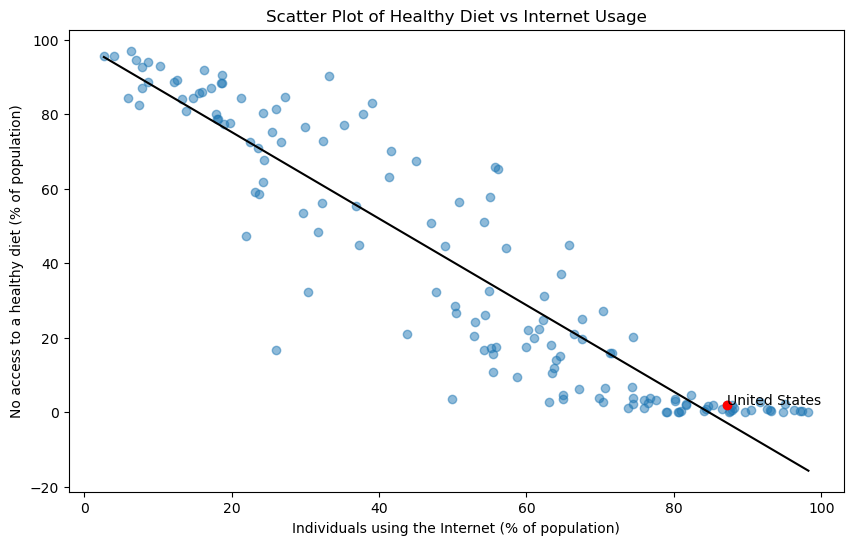

In [416]:
# clean dataset
merged_df.replace('..', np.nan, inplace=True)


xdata = merged_df['Individuals using the Internet (% of population)']
ydata = merged_df['percent_healthy_diet']

# set values to numeric
xdata_numeric = pd.to_numeric(xdata, errors='coerce')

# Masking NaN values
mask = ~pd.isna(xdata_numeric) & ~pd.isna(ydata)
xdata_masked = xdata_numeric[mask]  # Divide by 100 to convert percentage to a decimal value
ydata_masked = ydata[mask]



lmf,lmcov = np.polyfit(xdata_masked, ydata_masked, 1,    # polynomial degree (1 -> linear)
                     cov=True)           # option to return covariance matrix which
lme = np.sqrt(np.diag(lmcov))            #       is used to calculate uncertainties

print("intercept = %f +/- %f"%(lmf[1],lme[1]))
print("slope     = %f +/- %f"%(lmf[0],lme[0]))

# myfit[0] is our slope, myfit[1] is our y-intercept. y=mx+b

# Create a line from the fit slope and intercept...
xtheor1 = np.linspace(min(xdata_masked), max(xdata_masked), 100)
ytheor1 = lmf[0]*xtheor1 + lmf[1]

#Finding the USA
us_index = merged_df[merged_df['country_name'] == 'United States'].index[0]

# Get the x and y coordinates for the United States
us_x = xdata_masked[us_index]
us_y = ydata_masked[us_index]


plt.figure(figsize=(10, 6))  # Set the size of the plot

# Plotting the data
plt.scatter(xdata_masked, ydata_masked, alpha=0.5)
plt.plot(xtheor1,ytheor1,color='black',label='Linear Model Fit')
plt.scatter(us_x, us_y, color='red', label='United States')
plt.text(us_x, us_y, 'United States', ha='left')

plt.ylabel('No access to a healthy diet (% of population)')
plt.xlabel('Individuals using the Internet (% of population)')
plt.title('Scatter Plot of Healthy Diet vs Internet Usage')

#plt.grid(True)
plt.show()


In [417]:
print('% of population in USA without access to a healthy diet is', us_x,)
print('% of population in USA with access to the internet is', us_y)

% of population in USA without access to a healthy diet is 87.27488917
% of population in USA with access to the internet is 2.0


In [406]:
merged_df['Individuals using the Internet (% of population)'] = pd.to_numeric(merged_df['Individuals using the Internet (% of population)'], errors='coerce')
merged_df['percent_healthy_diet'] = pd.to_numeric(merged_df['percent_healthy_diet'], errors='coerce')

# Filter rows where internet usage > healthy diet
internet_greater_than_diet = merged_df[merged_df['Individuals using the Internet (% of population)'] < merged_df['percent_healthy_diet']]

# Get the list of countries where internet usage > healthy diet
countries_with_more_internet = internet_greater_than_diet['country_name'].tolist()

# Print the list of countries
print("Countries with more people with access to the internet than to a healthy diet:")
for country in countries_with_more_internet:
    print(country)

Countries with more people with access to the internet than to a healthy diet:
Angola
Bangladesh
Belize
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Congo, Dem. Rep.
Congo, Rep.
Djibouti
Egypt, Arab Rep.
Eswatini
Ethiopia
Gambia, The
Ghana
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
India
Indonesia
Jamaica
Kenya
Kyrgyz Republic
Lao PDR
Lesotho
Liberia
Low income
Lower middle income
Madagascar
Malawi
Mali
Mauritania
Mongolia
Mozambique
Myanmar
Namibia
Nepal
Nicaragua
Niger
Nigeria
Pakistan
Philippines
Rwanda
Sao Tome and Principe
Senegal
Sierra Leone
South Africa
South Asia
Sri Lanka
Sub-Saharan Africa
Sudan
Tajikistan
Tanzania
Uganda
Zambia
Zimbabwe


1) The scatter plot shows us the correlation between the percentage of a country's population that has access/uses the internet and the percentage of its population with access to a healthy diet. Each point on the plot represents a specific country in the year 2021, with the x-axis denoting the population size and the y-axis indicating the percentage of the population with a healthy diet. I chose for the year 2021 because it is the most recent data available. The red mark represents the United States. 2.0% of the American population does not have access to a healthy diet and 87.3% of the population has access to the internet. 

2) The model describes a downward sloping linear fit, which means that there is a negative relationship between the two variables. In other words, this means that when a country's percentage of the population that does not have access to a healthy diet, goes down, the percentage of the population that uses the internet goes up. A lot of undeveloped countries in Africa and South-Asia have a bigger % of their population with access to the internet than % of their population with access to a healthy diet. A couple of examples are: Burundi, Cameroon, Nigeria, Philippines, Bangladesh, Pakistan, etc. 

<h1> Graph 4 with analysis </h1>

<h3> Scatterplot with population and Percentage of Population without access to Healthy Diet </h3>

intercept = 0.000000 +/- 0.000000
slope     = -0.000000 +/- 0.000000


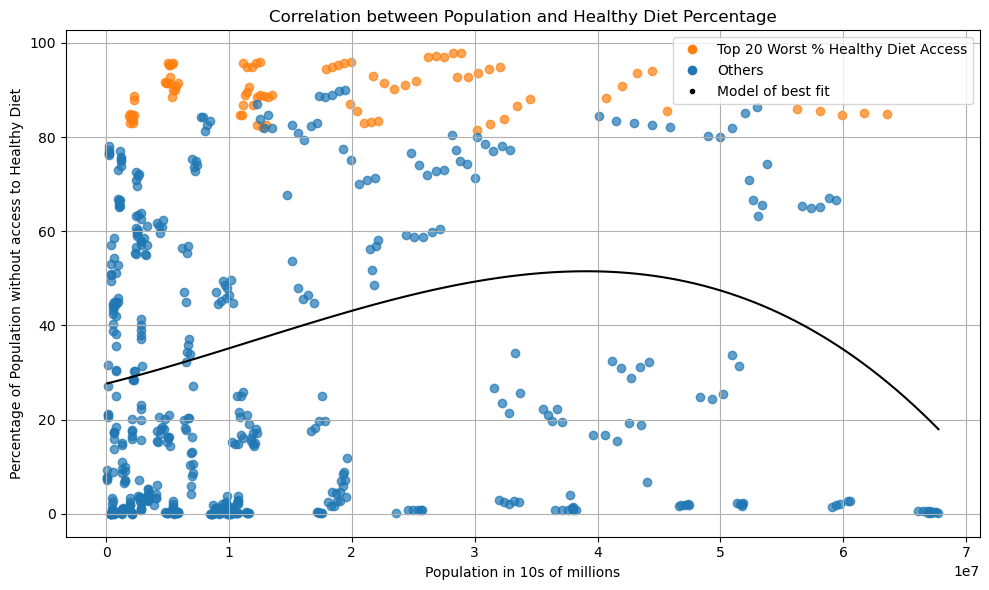

In [396]:
filtered_df_exclud_top20 = DFDiet_filtered2[~DFDiet_filtered2['country_name'].isin(top20)]

filtered_df_2021_exclud_top20 = filtered_df_exclud_top20[filtered_df_exclud_top20['year'] == 2021]

# filtered_df_2021_excluding_china_india = filtered_df_2021[(filtered_df_2021['country_name'] != 'China') & (filtered_df_2021['country_name'] != 'India')]

# countries_in_both = set(top20) & set(Top20Diet)


xdata = filtered_df_2021_exclud_top20['population']
ydata = filtered_df_2021_exclud_top20['percent_healthy_diet']

mask = np.logical_and(~np.isnan(xdata), ~np.isnan(ydata))
xdata_masked = xdata[mask]
ydata_masked = ydata[mask]

lmf,lmcov = np.polyfit(xdata_masked, ydata_masked, 3,    # polynomial degree (1 -> linear)
                     cov=True)           # option to return covariance matrix which
lme = np.sqrt(np.diag(lmcov))            #       is used to calculate uncertainties

print("intercept = %f +/- %f"%(lmf[1],lme[1]))
print("slope     = %f +/- %f"%(lmf[0],lme[0]))

# myfit[0] is our slope, myfit[1] is our y-intercept. y=mx+b

polyfunc = np.poly1d(lmf)

# Create a line from the fit slope and intercept...
xtheor = np.linspace(min(xdata_masked), max(xdata_masked), 100)
ytheor= polyfunc(xtheor)



plt.figure(figsize=(10, 6))  # Set the size of the plot


# Scatter plot
for index, row in filtered_df_exclud_top20.iterrows():
#     if row['country_name'] in countries_in_both:
#         plt.scatter(row['population'], row['percent_healthy_diet'], color='purple', alpha=0.7, label='In Both Top 20s')
#     elif row['country_name'] in top20:
#         plt.scatter(row['population'], row['percent_healthy_diet'], color='red', alpha=0.7, label='Top 20 Population')
    if row['country_name'] in Top20Diet:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='tab:orange', alpha=0.7, label='Top 20 Worst % Healthy Diet Access')
    else:
        plt.scatter(row['population'], row['percent_healthy_diet'], color='tab:blue', alpha=0.7, label='Others')
        
plt.plot(xtheor,ytheor,color='black',label='model of best fit')

# Add labels and title
plt.xlabel('Population in 10s of millions')
plt.ylabel('Percentage of Population without access to Healthy Diet')
plt.title('Correlation between Population and Healthy Diet Percentage')

plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent overlap

plt.legend(handles=[
    #plt.Line2D([], [], marker='o', color='red', label='Top 20 Population', linestyle='None'),
    plt.Line2D([], [], marker='o', color='tab:orange', label='Top 20 Worst % Healthy Diet Access', linestyle='None'),
    #plt.Line2D([], [], marker='o', color='purple', label='In Both Top 20s', linestyle='None'),
    plt.Line2D([], [], marker='o', color='tab:blue', label='Others', linestyle='None'),
    plt.Line2D([], [], marker='.', color='black', label='Model of best fit', linestyle='None')
])

# plt.annotate('USA',xy=(332500000,5),xytext=(340000000,20),
#              arrowprops={'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.3'}
#              ,horizontalalignment='center')     

# Show the plot
plt.show()

### Discussion:

1) The scatter plot shows us the correlation between a country's population size and the percentage of its population with a healthy diet. Each point on the plot represents a specific country in the year 2021, with the x-axis denoting the population size and the y-axis indicating the percentage of the population with access to a healthy diet. I chose for the year 2021 because it is the most recent data available. I also decided to exclude the top 20 countries with the highest populations because they could skew the analysis as outliers. The orange marks denote countries within the top 20 with the highest percentages of their populations lacking access to a healthy diet. 

2) More specifically, we can derive a couple of things from this graph. First of all, we can see that there is a positive correlation between a country's population and healthy diet percentage for countries with rather small populations and a negative correlation for countries with a rather bigger population. The tipping point seems to be around 40 million people. So, our model predicts that if a countries population is close to 40 million, the country has a pretty high % of the population with a lack of access to a healthy diet. The further away from that 40 million, either a very small or very big population, the percentage of the population with a lack of access to a healthy diet decreases. However, we can also see that our model of best fit doesn't really align with the distribution of the data. Therefore we can conclude that this model is insignificant and that there is not really any correlation between a country's population and the percentage of its population that does not have access to a healthy diet. 
